In [10]:
# This cell expands the cells of the notebook to the width of the window
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Week 5

## Python setup

In [11]:
%%capture
pip install fa2_modified

In [1]:
from fa2_modified import ForceAtlas2
import json
import math
import matplotlib as mpl
from matplotlib import colormaps
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pickle
import random
import re
import urllib.request
import networkx as nx

## Exercises Part A: Visualizations

In this section, we are introduced to the library [ForceAtlas2 (_Modified version)_](https://github.com/AminAlam/fa2_modified). The library is a more powerful alternative to the networkX library and can help create better visualisations.

In [2]:
# Folder to store the text files
cwd = os.getcwd()
folder_name = "saved_graphs"
folder_path = os.path.join(cwd, folder_name)
folder_path

'c:\\Users\\Julia\\Documents\\DTU\\02805_Social_Graphs_and_Interactions\\Exercise_solutions\\saved_graphs'

In [4]:
# Create file path
file_path = os.path.join(folder_path, "country_musicians.gexf")

In [5]:
# load graph object from file
G = nx.read_gexf(file_path)

# Test similarity:
print(G)

Graph with 2003 nodes and 14229 edges


### A.1 Plot the Network using ForceAtlas2

Below is the code taken from the example in the documentation:

In [101]:
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 2]
G.remove_nodes_from(to_be_removed)

fa2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs (thinning edges, so we can see the structure)
    linLogMode=False,  # NOT IMPLEMENTED
    adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
    edgeWeightInfluence=5.0,

    # Performance
    jitterTolerance=8.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  # NOT IMPLEMENTED

    # Tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=0.1,

    # Log
    verbose=True)

In [104]:
positions = fa2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:43<00:00, 45.64it/s]

BarnesHut Approximation  took  6.98  seconds
Repulsion forces  took  33.89  seconds
Gravitational forces  took  0.20  seconds
Attraction forces  took  0.98  seconds
AdjustSpeedAndApplyForces step  took  1.00  seconds


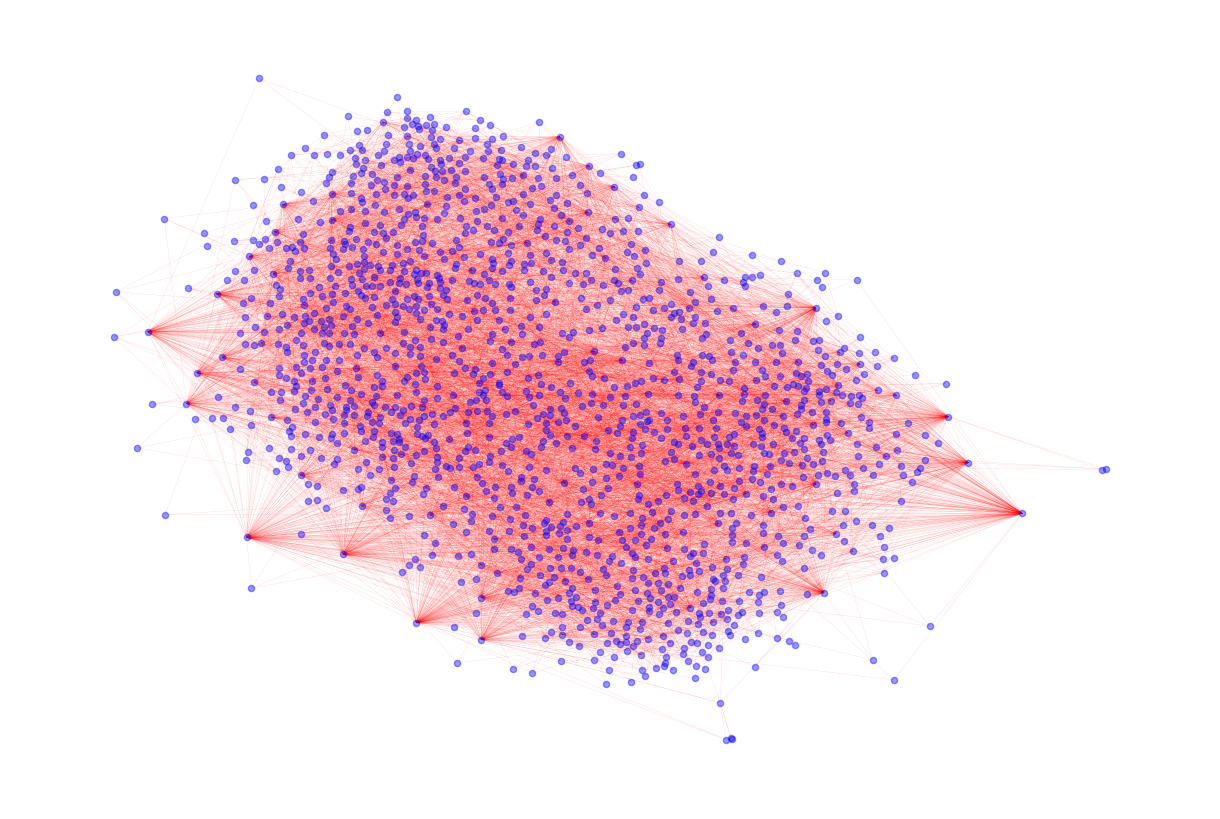

In [105]:
# nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
# nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.1)
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos=positions,
    node_size=20,
    node_color="blue",
    alpha=0.4,
    width=0.1,
    edge_color="red",
    with_labels=False
)

plt.axis('off')
plt.show()

100%|██████████| 200/200 [00:04<00:00, 41.51it/s]


BarnesHut Approximation  took  0.87  seconds
Repulsion forces  took  3.62  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.12  seconds


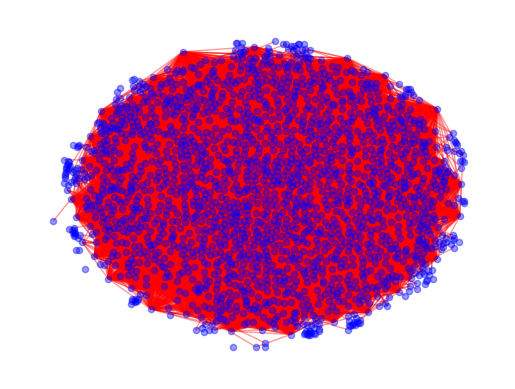

In [80]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=True,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="red",width=1.0, alpha=0.4)
plt.axis('off')
plt.show()

Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

## Part B

Exercise 3: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).

1.What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?

Exercise 4: Centralities, assortativity and more.

1.Find the 5 most central characters according to degree centrality.

2.Find the 5 most central characters according to betweenness centrality.

3.Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).

4.Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?

5.Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.

6.Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?

7.What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes N and probablity of connection p?

## Part C

Exercise 5: Visualizing the Network Backbone

1.Extract the network backbone for both Weighted Network 1 and 2. You can implement it yourself based on the scientific paper or find an implentation on GitHub (there are several ones to choose from ... I like this implementation, which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of α to get an aestetically pleasing visualization (but don't make the resulting network too sparse).

2.Plot the resulting two networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.

3.Comment on your results

- Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the two networks. Describe your findings in your own words.
- Weighted network 1 and 2 are very different. We have removed edges with low/high edge betweenness centrality respectively. What has that done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structure.
